# Modelo Machine Learning

Este modelo tiene por objetivo predecir la variable `presunta_infraccion` y `tipo` dado un vector de características. Es decir, el problema es de clasificación, donde se busca encontrar un $\psi:\mathbb{R}^n \to \mathbb{R}^k$. Donde $n$ es el número de `features` y $k$, el número de clases y $X \in \mathbb{R}^n$

In [1]:
import pandas as pd
import numpy as np

path_data = 'data/mdi_detenidos_2024_limpio.csv'
df = pd.read_csv(path_data)
df.shape

(40976, 8)

In [2]:
df.head()

,tipo,estado_civil,edad,genero,tipo_lugar,codigo_provincia,nombre_provincia,presunta_infraccion
0,APREHENDIDO,SOLTERO/A,19,MASCULINO,ÁREA DE ACCESO PÚBLICO,2,BOLÍVAR,OTROS
1,DETENIDO,CASADO/A,40,MASCULINO,ÁREA PRIVADA,15,NAPO,CONTRAVENCION DE VIOLENCIA CONTRA LA MUJER O M...
2,APREHENDIDO,SOLTERO/A,36,FEMENINO,OTROS,17,PICHINCHA,CONTRAVENCION DE VIOLENCIA CONTRA LA MUJER O M...
3,APREHENDIDO,SOLTERO/A,26,MASCULINO,ÁREA DE ACCESO PÚBLICO,17,PICHINCHA,DELITOS CONTRA EL DERECHO A LA PROPIEDAD
4,APREHENDIDO,DIVORCIADO/A,34,MASCULINO,ÁREA DE ACCESO PÚBLICO,1,AZUAY,CONTRAVENCION DE VIOLENCIA CONTRA LA MUJER O M...


In [7]:
df.dtypes

tipo                   object
estado_civil           object
edad                    int64
genero                 object
tipo_lugar             object
codigo_provincia        int64
nombre_provincia       object
presunta_infraccion    object
dtype: object

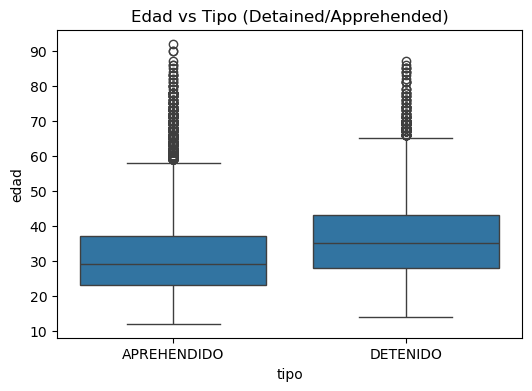

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# --- Numeric correlation (Pearson)
plt.figure(figsize=(6,4))
sns.boxplot(x="tipo", y="edad", data=df)
plt.title("Edad vs Tipo (Detained/Apprehended)")
plt.show()

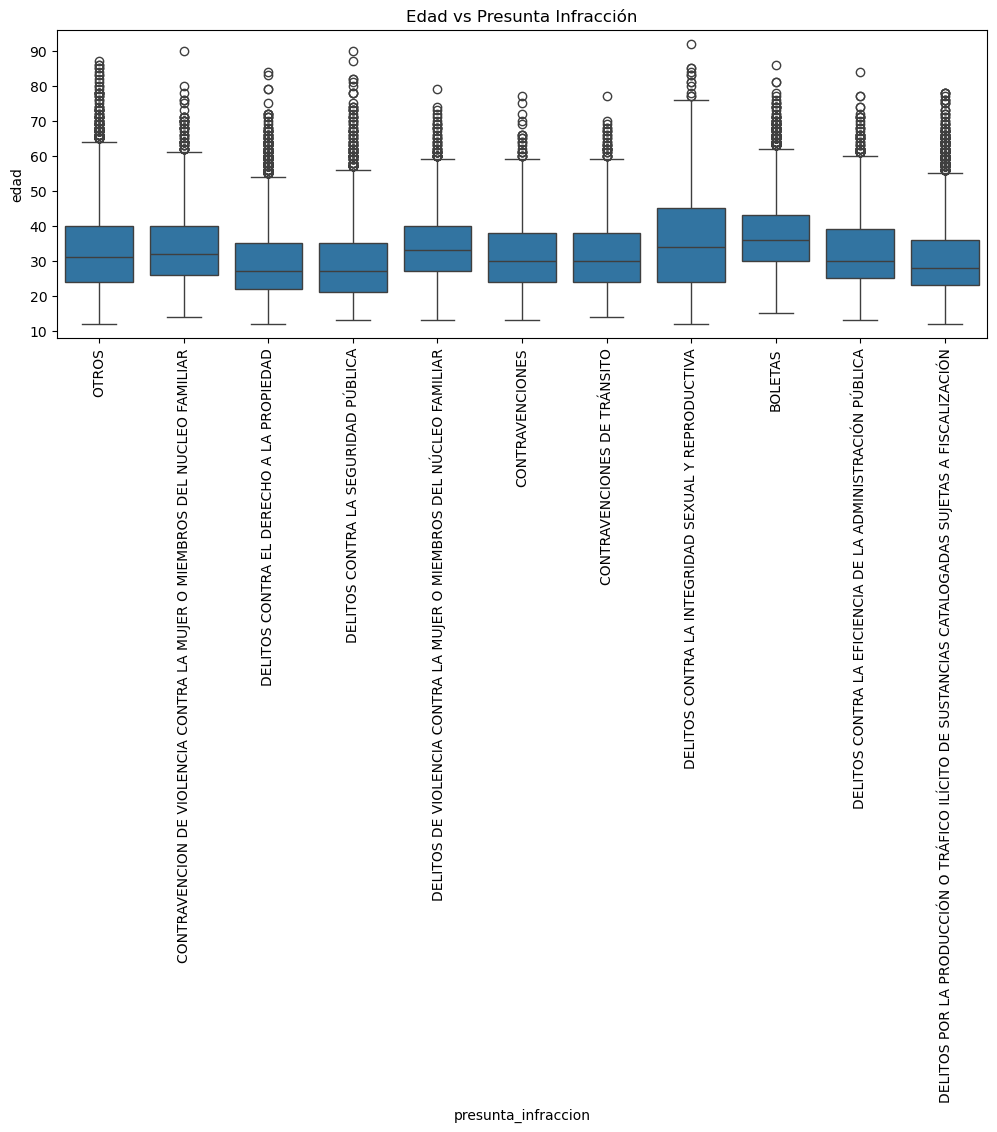

In [9]:
plt.figure(figsize=(12,4))
sns.boxplot(x="presunta_infraccion", y="edad", data=df)
plt.xticks(rotation=90)
plt.title("Edad vs Presunta Infracción")
plt.show()

In [10]:
from scipy.stats import chi2_contingency

# --- Function for Cramér's V (categorical correlation)
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    r, k = confusion_matrix.shape
    return np.sqrt((chi2/n) / (min(k-1, r-1)))

# Compute categorical correlations with targets
cat_cols = df.select_dtypes(include=['object']).columns
for col in cat_cols:
    if col not in ["tipo","presunta_infraccion"]:
        print(f"{col} vs tipo (Cramér's V): {cramers_v(df[col], df['tipo']):.3f}")
        print(f"{col} vs presunta_infraccion (Cramér's V): {cramers_v(df[col], df['presunta_infraccion']):.3f}")

estado_civil vs tipo (Cramér's V): 0.191
estado_civil vs presunta_infraccion (Cramér's V): 0.121
genero vs tipo (Cramér's V): 0.033
genero vs presunta_infraccion (Cramér's V): 0.077
tipo_lugar vs tipo (Cramér's V): 0.156
tipo_lugar vs presunta_infraccion (Cramér's V): 0.247
nombre_provincia vs tipo (Cramér's V): 0.132
nombre_provincia vs presunta_infraccion (Cramér's V): 0.154
